In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [274]:
with open('dataset/captions/Flickr8k.token.txt') as f:
    data = f.readlines()
data[0:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .\n',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .\n',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .\n',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .\n',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .\n',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting\n',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .\n',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .\n',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .\n',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .\n']

Each image contains 5 associated captions. the format of the data is as follows<br>
image_name#i ith_caption

In [275]:
print('total images: ', len(data))

total images:  40460


In [276]:
# we'll be creating a dictionary which will contain all the list 
descriptions = dict()
for line in data:
    # get the key
    img_name = line.split('.')[0]
    # check whether the img_name is unique if yes then initialise it with an empty list
    if img_name not in descriptions.keys():
        descriptions[img_name] = list()
        
    #*******PREPROCESSING************    
    
    # else and otherwise we'll append to that list our captions
    # extract the caption and remove the '\n' present at the end
    tmp = line.split('\t')[-1].strip('\n').lower()
    # split the sentence into words
    tmp = line.split()
    # remove words such as 'a' and check if the word is alpha and not $, #, ^ ...
    tmp = [word for word in tmp if len(word) > 1 and word.isalpha()]
    # join the words back to form a sentence
    tmp = " ".join(tmp)
    # and remove punctuations using translate if there are some
    descriptions[img_name].append(tmp.translate(str.maketrans("","",string.punctuation)))

In [277]:
# let's test it out
descriptions['1351764581_4d4fb1b40f']

['firefighter extinguishes fire under the hood of car',
 'fireman spraying water into the hood of small white car on jack',
 'fireman sprays inside the open hood of small white car on jack',
 'fireman using firehose on car engine that is up on carjack',
 'Firefighter uses water to extinguish car that was on fire']

one thing to notice about these captions is that some of the words are in upper case and some lower we've to get rid of these. we can use .lower() to make the sentence lower.<br> We also have to get rid of '.' and other kind of punctuations.

In [278]:
# a demonstration of how translate works
"Hi this is Kishan, and fuck off.".translate(str.maketrans("","",string.punctuation))

'Hi this is Kishan and fuck off'

In [279]:
# demonstration of how " ".join() works
a = ["hi", "there", "how", "the", "fuck", "are", "you"]
" ".join(a)

'hi there how the fuck are you'

Let's summarise what we've done till now and what are we gonna do later<br>
Things we've done
<ol>
    <li> We've built a dictionary that maps all the captions pertaining to a particular image</li>
</ol>
<br>
Things we are going to do next<br>
<ol> 
    <li> We're going to first build our training dataset based on the dictionary that we've created</li>
    <li> rest will be explained as we go further...</li>
</ol>

In [285]:
# load the training images from the file named Flickr_8k.trainImages.txt
with open('dataset/captions/Flickr_8k.trainImages.txt') as f:
    training_images = f.readlines()
print('length of the training data: ', len(training_images))

length of the training data:  6000


In [287]:
# we need to remove the .jpg and \n because then only we can extract the captions from our description dictionary
training_images = [t_images.split('.')[0] for t_images in training_images]
training_images[0:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [288]:
# we need to build our dataset in such a way that every caption that starts start with some identifier and also ends with some identifier
# we call this identifier as <SOS> and <EOS> which means StartOfSequence and EndOfSequence
training_descriptions = dict()
for img_name in training_images:
    # check whether the img_name is present or not in the descriptions
    if img_name in descriptions.keys():
        # if present initialise the training_description
        training_descriptions[img_name] = list()
        # extract all the captions
        captions = descriptions[img_name]
        for caption in captions:
            training_descriptions[img_name].append("<SOS> " + caption + " <EOS>")

In [289]:
training_descriptions['2513260012_03d33305cf']

['<SOS> black dog is running after white dog in the snow <EOS>',
 '<SOS> Black dog chasing brown dog through snow <EOS>',
 '<SOS> Two dogs chase each other across the snowy ground <EOS>',
 '<SOS> Two dogs play together in the snow <EOS>',
 '<SOS> Two dogs running through low lying body of water <EOS>']

<b>Similarly with the testing set</b>

In [406]:
with open('dataset/captions/Flickr_8k.testImages.txt') as f:
    testing_images = f.readlines()
testing_images[0:5]

['3385593926_d3e9c21170.jpg\n',
 '2677656448_6b7e7702af.jpg\n',
 '311146855_0b65fdb169.jpg\n',
 '1258913059_07c613f7ff.jpg\n',
 '241347760_d44c8d3a01.jpg\n']

In [407]:
testing_images = [t_images.split('.')[0] for t_images in testing_images]

In [408]:
testing_descriptions = dict()
for img_name in testing_images:
    # check whether the img_name is present or not in the descriptions
    if img_name in descriptions.keys():
        # if present initialise the training_description
        testing_descriptions[img_name] = list()
        # extract all the captions
        captions = descriptions[img_name]
        for caption in captions:
            testing_descriptions[img_name].append("<SOS> " + caption + " <EOS>")

In [409]:
testing_descriptions['3385593926_d3e9c21170']

['<SOS> The dogs are in the snow in front of fence <EOS>',
 '<SOS> The dogs play on the snow <EOS>',
 '<SOS> Two brown dogs playfully fight in the snow <EOS>',
 '<SOS> Two brown dogs wrestle in the snow <EOS>',
 '<SOS> Two dogs playing in the snow <EOS>']

In [291]:
# we've built the caption as how they should look, we need to preprocess the images as well
# all we want is some vector representation of those images because it is these vectors that will be fed to the RNNs
# we can use some pretrained model to acts as our feature extractor and here we'll be using vgg16 for our purpose
from keras.applications.vgg16 import VGG16
base_model = VGG16(include_top=True, weights='imagenet') # we only want to get rid of the softmax layer
# first get the summary of how it looks like
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Image preprocessing / Encoding phase

In [292]:
from tqdm import tqdm
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
# we'll remove the last layer
model = Model(base_model.input, base_model.layers[-2].output)
# the model will output a 4096 feature vector
# the next task is to pass all the images to this layer and extract the features of it

In [293]:
def preprocess_image(img_name, directory):
    """
    It takes the name of an image and the directory in which it is placed
    and outputs the processed image
    """
    img = image.load_img(directory + img_name + ".jpg", target_size=(224, 224)) # since the vgg16 requires 224,224
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)
    return img

In [83]:
# we'll create a dictionary that will map each training image with its feature vector
feature_mapping = dict()
directory = "dataset/images/"
for img_name in tqdm(training_images):
    # first we need to preprocess the image before inputting it into the network 
    img = preprocess_image(img_name, directory)
    features = model.predict(img)
    feature_mapping[img_name] = np.reshape(features, features.shape[1])

100%|██████████| 6000/6000 [1:46:08<00:00,  2.46it/s]     


In [96]:
feature_mapping_test = dict()
directory = "dataset/images/"
for img_name in tqdm(testing_images):
    # first we need to preprocess the image before inputting it into the network 
    img = preprocess_image(img_name, directory)
    features = model.predict(img)
    feature_mapping_test[img_name] = np.reshape(features, features.shape[1])

100%|██████████| 1000/1000 [06:44<00:00,  2.49it/s]


In [89]:
# finally save the dictionary in a pickle file
import pickle
with open('train_images_encoded.pickle', 'wb') as f:
    pickle.dump(feature_mapping, f, protocol=pickle.HIGHEST_PROTOCOL)

In [97]:
with open('test_images_encoded.pickle', 'wb') as f:
    pickle.dump(feature_mapping_test, f, protocol=pickle.HIGHEST_PROTOCOL)

<b> Read back the file</b>

In [327]:
# let's read it back to see it is working fine
with open('train_images_encoded.pickle', 'rb') as f:
    train_feature_mapping = pickle.load(f)

In [328]:
with open('test_images_encoded.pickle', 'rb') as f:
    test_feature_mapping = pickle.load(f)

# Text preprocessing / Encoding Phase

In [329]:
from keras.preprocessing.text import Tokenizer

In [330]:
# instead of the above process we will use tokenizer for converting the word to int
# code from https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/
def to_lines(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

def create_tokenizer(descriptions):
    # descriptions is a dictionary for fitting a tokenizer we need a list of sequences
    sentences = to_lines(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)
    return tokenizer

In [331]:
# prepare a tokenizer
tokenizer = create_tokenizer(training_descriptions)
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

7266


In [332]:
# we also need to find the caption that has maximum length, so that we can pad all the other captions to be that size
# because RNNs require constant size sequences
# max_len = 0
# for captions in training_descriptions.values():
#     for caption in captions:
#         words = caption.split()
#         max_len = max(max_len, len(words))
def max_length(descriptions):
    lines = to_lines(descriptions)
    return max(len(d.split()) for d in lines)

In [333]:
max_len = max_length(training_descriptions)
print("max len: ", max_length(training_descriptions))

max len:  33


How do we create our dataset so that it can be fed into the RNN network, let's have a look at it.<br>
Initially we need to input the "image_features" and the "first word of the caption" which is "<SOS\>" token.<br>
input : image_feature + '<SOS\>', at t = 1<br>
input : image_feature + '<SOS\>, the', at t = 2<br>
and so on ...

In [334]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [421]:
# we'll be employing a data generator that will help us in training the model without completely loading the data in memory
# we'll use this generator to fit the RNN model
def data_generator(descriptions, encodings, batch_size):
    # since the input to the model is two things 
    # 1: image_feature 2: word_feature
    X1 = list() # to contain the image features
    X2 = list() # to contain the word features
    y = list() # to contain the prediction
    n = 1
    while True:
        for img_name, captions in descriptions.items():
            n += 1
            image_feature = encodings[img_name]
            for caption in captions:
                # encode the sequence by changing the word to the index (use word2index dictionary)
                # furthermore built the data as required by the RNN
                # i.e. split the sequence into multiple pairs as described above
                seq = tokenizer.texts_to_sequences([caption.split()])[0]# furthermore only allow the words that are present in the dictionary
                for i in range(1, len(seq)):
                    # build the pairs
                    x_seq, y_seq = seq[:i], seq[i]
                    # now pad the sequences (using keras pad sequences so as all the sequences have same size)
                    x_seq = pad_sequences([x_seq], maxlen=max_len)[0]
                    # convert the y to categorical
                    y_seq = to_categorical([y_seq], num_classes=vocab_size)[0]
                    
                    X1.append(image_feature)
                    X2.append(x_seq)
                    y.append(y_seq)
                    
            if n == batch_size:
                yield ([np.array(X1), np.array(X2)], np.array(y))
                # reinitialise it
                X1 = list()
                X2 = list()
                y = list()
                n = 0 

In [439]:
# these words that we've used are one hot encoded, we need to get word embedding by representing it in a dense form
# we will map each word to a 200 long vector, currently each word is represented by 3054 long vector
# instead of learning word embedding by ourselves we'll use pre-trained word embeddings (GloVe)

# Model architecture
the model takes its input from two segments, the first segment brings the image_features whereas the second segment brings the recurring word features (which is followed by a Embedding layer)

In [428]:
from keras.layers import Input, Dense, Embedding, Dropout, LSTM, add

In [434]:
# image feature segment
image_input = Input(shape=(4096,), name="image_input")
# s stands for segment
s1 = Dropout(0.5, name="image_segment_dropout")(image_input)
s1 = Dense(units=256, activation='relu')(s1)

# caption sequence segment
caption_input = Input(shape=(max_len,), name="caption_input")
s2 = Embedding(vocab_size, embedding_dim, mask_zero=True, name="embedding_layer")(caption_input)
s2 = Dropout(0.5, name="caption_segment_dropout")(s2)
s2 = LSTM(256, name='LSTM')(s2)

# decoder model
decoder = add([s1, s2], name="decoder")
decoder = Dense(units=256, activation='relu', name="decoder_dense")(decoder)
outputs = Dense(units=vocab_size, activation='softmax', name='outputs')(decoder)

final = Model(inputs=[image_input, caption_input], outputs=outputs)
final.summary()

Model: "model_28"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
caption_input (InputLayer)      (None, 33)           0                                            
__________________________________________________________________________________________________
image_input (InputLayer)        (None, 4096)         0                                            
__________________________________________________________________________________________________
embedding_layer (Embedding)     (None, 33, 200)      1453200     caption_input[0][0]              
__________________________________________________________________________________________________
image_segment_dropout (Dropout) (None, 4096)         0           image_input[0][0]                
___________________________________________________________________________________________

In [436]:
final.compile(optimizer='adam', loss='categorical_crossentropy')

In [437]:
# build the generators
train_gen = data_generator(training_descriptions, encodings=train_feature_mapping, batch_size=16)
val_gen = data_generator(testing_descriptions, encodings=test_feature_mapping, batch_size=16)

In [481]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [ModelCheckpoint('model/best.h5', monitor='val_loss', save_best_only=True, save_weights_only=False)]

In [ ]:
history = final.fit_generator(generator=train_gen, epochs=20, steps_per_epoch=len(training_descriptions) / 16, validation_data=val_gen, validation_steps=len(testing_descriptions) / 16, callbacks=callbacks)

Epoch 1/20
123/375 [========>.....................] - ETA: 6:31 - loss: 3.0194

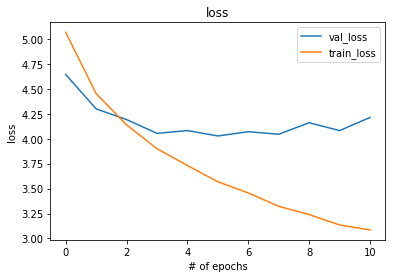

In [451]:
plt.title('loss')
plt.xlabel('# of epochs')
plt.ylabel('loss')
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.legend(['val_loss', 'train_loss'])
plt.show()

In [456]:
from keras.models import load_model

In [468]:
# map an integer to a word
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# generate a description for an image
def generate_desc(model, tokenizer, feature, max_length):
    # seed the generation process
    in_text = '<SOS>'
    # iterate over the whole length of the sequence
    for i in range(max_length):
        # integer encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad input
        sequence = pad_sequences([sequence], maxlen=max_len)
        # predict next word
        yhat = model.predict([feature, sequence], verbose=0)
        # convert probability to integer
        yhat = np.argmax(yhat)
        # map integer to word
        word = word_for_id(yhat, tokenizer)
        # stop if we cannot map the word
        if word is None:
            break
        # append as input for generating the next word
        in_text += ' ' + word
        # stop if we predict the end of the sequence
        if word == '<EOS>':
            break
    return in_text

In [469]:
model = load_model('model/best.h5')

In [470]:
def extract_features(filename):
    # load the model
    model = VGG16()
    # re-structure the model
    model.layers.pop()
    model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
    # load the photo
    img = image.load_img(filename, target_size=(224, 224))
    # convert the image pixels to a numpy array
    img = image.img_to_array(img)
    # reshape data for the model
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    # prepare the image for the VGG model
    img = preprocess_input(img)
    # get features
    feature = model.predict(img, verbose=0)
    return feature

In [476]:
feature = extract_features('testing_image2.jpg')

In [477]:
description = generate_desc(model, tokenizer, feature, max_len)

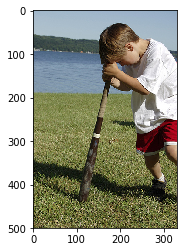

In [480]:
img = image.load_img('testing_image2.jpg')
plt.imshow(img)
plt.show()

In [479]:
description

'<SOS> little boy in blue shirt is playing with blue ball in the background and white and white shirt is holding her arms in the background and white and white shirt is holding her'